In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/preprocesseddata/Training/fourier1_x.csv
/kaggle/input/preprocesseddata/Training/fourdays_1.csv
/kaggle/input/preprocesseddata/Training/yearly_trend.csv
/kaggle/input/preprocesseddata/Training/access_ohe.csv
/kaggle/input/preprocesseddata/Training/weekly_trend.csv
/kaggle/input/preprocesseddata/Training/fourier2_y.csv
/kaggle/input/preprocesseddata/Training/spider_ohe.csv
/kaggle/input/preprocesseddata/Training/fourier3_y.csv
/kaggle/input/preprocesseddata/Training/fourdays_3.csv
/kaggle/input/preprocesseddata/Training/monthly_trend.csv
/kaggle/input/preprocesseddata/Training/fourier2_x.csv
/kaggle/input/preprocesseddata/Training/fourdays_2.csv
/kaggle/input/preprocesseddata/Training/prj_ohe.csv
/kaggle/input/preprocesseddata/Training/fourier1_y.csv
/kaggle/input/preprocesseddata/Training/week_day_ohe.csv
/kaggle/input/preprocesseddata/Training/rand_trend.csv
/kaggle/input/preprocesseddata/Training/target.csv
/kaggle/input/preprocesseddata/Training/fourier3_x.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [3]:
file_paths = [
    '/kaggle/input/preprocesseddata/Training/access_ohe.csv',
    '/kaggle/input/preprocesseddata/Training/fourdays_1.csv',
    '/kaggle/input/preprocesseddata/Training/fourdays_2.csv',
    '/kaggle/input/preprocesseddata/Training/fourdays_3.csv',
    '/kaggle/input/preprocesseddata/Training/fourier1_x.csv',
    '/kaggle/input/preprocesseddata/Training/fourier2_x.csv',
    '/kaggle/input/preprocesseddata/Training/fourier3_x.csv',
    '/kaggle/input/preprocesseddata/Training/fourier1_y.csv',
    '/kaggle/input/preprocesseddata/Training/fourier2_y.csv',
    '/kaggle/input/preprocesseddata/Training/fourier3_y.csv',
    '/kaggle/input/preprocesseddata/Training/monthly_trend.csv',
    '/kaggle/input/preprocesseddata/Training/prj_ohe.csv',
    '/kaggle/input/preprocesseddata/Training/rand_trend.csv',
    '/kaggle/input/preprocesseddata/Training/spider_ohe.csv',
    '/kaggle/input/preprocesseddata/Training/week_day_ohe.csv',
    '/kaggle/input/preprocesseddata/Training/weekly_trend.csv',
    '/kaggle/input/preprocesseddata/Training/yearly_trend.csv',
    '/kaggle/input/preprocesseddata/Training/target.csv'
]

access_ohe = pd.read_csv(file_paths[0]).values
fourdays_1 = pd.read_csv(file_paths[1]).values
fourdays_2 = pd.read_csv(file_paths[2]).values
fourdays_3 = pd.read_csv(file_paths[3]).values
fourier1_x = pd.read_csv(file_paths[4]).values
fourier2_x = pd.read_csv(file_paths[5]).values
fourier3_x = pd.read_csv(file_paths[6]).values
fourier1_y = pd.read_csv(file_paths[7]).values
fourier2_y = pd.read_csv(file_paths[8]).values
fourier3_y = pd.read_csv(file_paths[9]).values
monthly_trend = pd.read_csv(file_paths[10]).values
prj_ohe = pd.read_csv(file_paths[11]).values
rand_trend = pd.read_csv(file_paths[12]).values
spider_ohe = pd.read_csv(file_paths[13]).values
week_day_ohe = pd.read_csv(file_paths[14]).values
weekly_trend = pd.read_csv(file_paths[15]).values
yearly_trend = pd.read_csv(file_paths[16]).values
target = pd.read_csv(file_paths[17]).values


In [4]:
data=np.column_stack((week_day_ohe,weekly_trend,fourdays_1,fourdays_2,
                      fourdays_3,prj_ohe,spider_ohe,access_ohe,fourier1_x,
                      fourier2_x,fourier3_x,fourier1_y,fourier2_y,fourier3_y))

In [5]:
indices = np.random.permutation(data.shape[0]) # Shuffling the indexes of our data

training_idx, test_idx = indices[:int(0.75*data.shape[0])], indices[int(0.75*data.shape[0]):]

x_train,x_test = data[training_idx,:], data[test_idx,:]

y_train,y_test=target[training_idx,:],target[test_idx,:]

In [6]:
y_train=y_train.reshape(y_train.shape[0])
y_test=y_test.reshape(y_test.shape[0])

# Training

In [7]:
def smape(true_values, forecast_values):
    """
    Compute SMAPE (Symmetric Mean Absolute Percentage Error) given the true and forecast values.
    
    Args:
        true_values (numpy.ndarray): Array of true values.
        forecast_values (numpy.ndarray): Array of forecast values.
        
    Returns:
        float: SMAPE value between 0 and 100.
    """
    # Compute absolute difference and sum of absolute values
    abs_difference = np.abs(true_values - forecast_values)
    abs_sum = np.abs(true_values) + np.abs(forecast_values)
    
    # Avoid division by zero
    non_zero_mask = abs_sum != 0
    
    # Compute SMAPE
    smape_value = np.mean(100 * (abs_difference[non_zero_mask] / abs_sum[non_zero_mask]))
    
    return smape_value

In [8]:
depths = [50, 500, 1000]

min_samples = [10, 50, 100, 500]

decision_tree_reg = DecisionTreeRegressor()

hyperparameters_grid = {'max_depth': depths, 'min_samples_split': min_samples}

grid_search = GridSearchCV(estimator = decision_tree_reg, scoring=make_scorer(smape,greater_is_better=False), 
                           param_grid = hyperparameters_grid, cv = 3, verbose=30, n_jobs = -1)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 500, 1000],
                         'min_samples_split': [10, 50, 100, 500]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=30)

In [9]:
grid_search.best_params_

{'max_depth': 500, 'min_samples_split': 10}

In [10]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_best = DecisionTreeRegressor(random_state=0, max_depth=500, min_samples_split=10)

decision_tree_best.fit(x_train, y_train)

predictions = decision_tree_best.predict(x_test)

smape_score = smape(y_test, predictions)

print('Best SMAPE score : ', smape_score)

Best SMAPE score :  19.906005381371468


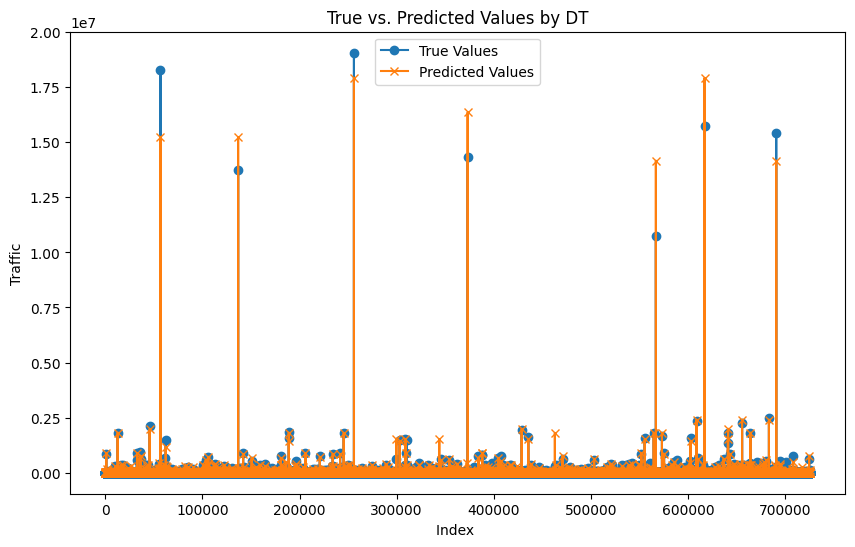

[CV 3/3; 1/12] START max_depth=50, min_samples_split=10.........................
[CV 3/3; 1/12] END max_depth=50, min_samples_split=10;, score=-30.268 total time= 1.5min
[CV 2/3; 3/12] START max_depth=50, min_samples_split=100........................
[CV 2/3; 3/12] END max_depth=50, min_samples_split=100;, score=-30.969 total time= 1.4min
[CV 3/3; 4/12] START max_depth=50, min_samples_split=500........................
[CV 3/3; 4/12] END max_depth=50, min_samples_split=500;, score=-33.798 total time= 1.4min
[CV 1/3; 6/12] START max_depth=500, min_samples_split=50........................
[CV 1/3; 6/12] END max_depth=500, min_samples_split=50;, score=-21.939 total time= 1.5min
[CV 1/3; 7/12] START max_depth=500, min_samples_split=100.......................
[CV 1/3; 7/12] END max_depth=500, min_samples_split=100;, score=-24.060 total time= 1.5min
[CV 1/3; 8/12] START max_depth=500, min_samples_split=500.......................
[CV 1/3; 8/12] END max_depth=500, min_samples_split=500;, score=

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='True Values', marker='o')
plt.plot(predictions, label='Predicted Values', marker='x')

plt.title('True vs. Predicted Values by DT')
plt.xlabel('Index ')
plt.ylabel('Traffic')
plt.legend()
plt.show()